# Pandas

pandas is a very popular and easy-to-learn Python library for handling tabular data. It can take in data from a wide range of sources such as CSV files, Excel files, HTML tables on the web, and text files. It allows you to apply the same framework to all of these sources to clean and analyze the data using optimized built-in functionality which scales very well with large datasets.

In [56]:
import pandas as pd

In [57]:
pima = pd.read_csv("diabetes.csv")

In [58]:
display(pima)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Typically, we will only want a subset of the available columns in our DataFrame. We can select a single column using single brackets and the name of the column as shown below.

In [43]:
pima['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

The result is a Series object with its own set of attributes and methods. These objects are like arrays and are the building blocks of DataFrames; each DataFrame is made up of a set of Series.

To select multiple columns at once, we use double brackets and commas between column names as shown below.

In [44]:
pima[['Glucose', 'Pregnancies']]

,Glucose,Pregnancies
0,148,6
1,85,1
2,183,8
3,89,1
4,137,0
...,...,...
763,101,10
764,122,2
765,121,5
766,126,1


The result is a new DataFrame object with the selected columns. It is useful to select the columns you are interested in analyzing before moving onto the analysis, especially if the data is wide with many unnecessary variables.

We can also compute some interesting statistics to answer some business questions. The first question we may have is what the average and median price is for the listings in our data. We use the built-in .mean() and .median() methods to compute these.

In [45]:
pima['BloodPressure'].mean()

69.10546875

In [46]:
pima['BloodPressure'].max()

122

We can also conduct these calculations on groupings of data using the .groupby() method. This function is very similar to using pivot tables in excel as we select a subset of columns in our data and then conduct aggregate calculations on them.

In [52]:
pima[['Glucose', 'Pregnancies', 'BloodPressure']].groupby('Pregnancies', as_index=False).mean()

,Pregnancies,Glucose,BloodPressure
0,0,123.000000,67.153153
1,1,112.748148,67.792593
2,2,110.796117,63.252427
3,3,123.586667,66.586667
4,4,125.117647,70.029412
5,5,118.859649,76.210526
6,6,120.800000,68.420000
7,7,136.444444,70.777778
8,8,131.736842,75.184211
9,9,131.392857,77.892857


Often, we are only interested in a subset of the rows in our dataset. For example, we may only be interested in People with a certain blood pressure. We do this by passing a Boolean expression into single brackets as shown below.

In [53]:
bp_under_65 = pima[pima['BloodPressure'] < 65]
bp_under_65.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
13,1,189,60,23,846,30.1,0.398,59,1


# Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

In this tutorial, we will use Logistic Regression to solve a binary classification problem. You can download the dataset from here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

We will simplify columns by providing col_names to pandas read_csv() function.

In [59]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv("diabetes.csv")

In [60]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [61]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [62]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). 

In [63]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

f:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [64]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 257.44, 'Predicted label')

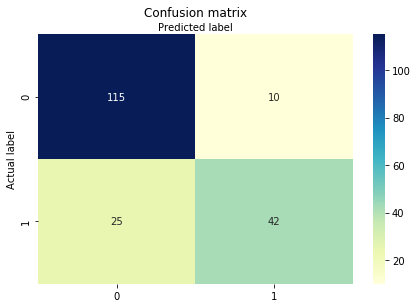

In [65]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [38]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192

